<a href="https://colab.research.google.com/github/thetime50/colab-notebook/blob/main/machine-learning/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

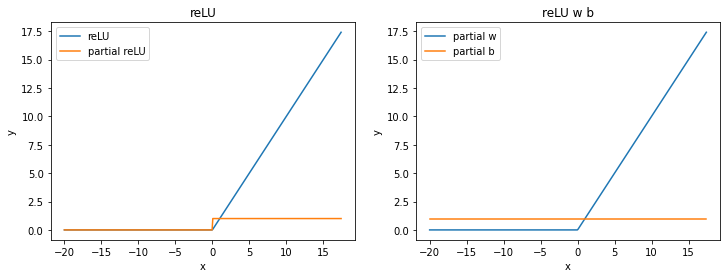

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import random


class Fun:
  def __init__(self,fun,pFun,pwFun,pbFun):
    self.fun = fun
    self.pFun = pFun
    self.pwFun = pwFun
    self.pbFun = pbFun
  
def drawFun(title,f,start=-20,end=20,step=0.1):
  x = np.arange(start,end,step,np.float16)
  yr = [ f.fun(i) for i in x]
  ypr = [ f.pFun(i) for i in x]
  ypwr = [ f.pwFun(i) for i in x]
  ypbr = [ f.pbFun(i) for i in x]

  plt.figure(figsize=(6*2,4))
  plt.subplot(121)
  plt.plot(x, yr, label=title)
  plt.plot(x, ypr, label='partial '+title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.title("{}".format(title))
  plt.subplot(122)
  plt.plot(x, ypwr, label='partial w')
  plt.plot(x, ypbr, label='partial b')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.title("{} w b".format(title))
  plt.show()

reLU = Fun( 
  (lambda x:x>0 and x or 0),
  (lambda x:x>0 and 1 or 0),
  (lambda x:x>0 and x or 0),
  (lambda x: 1)
)
drawFun('reLU',reLU)

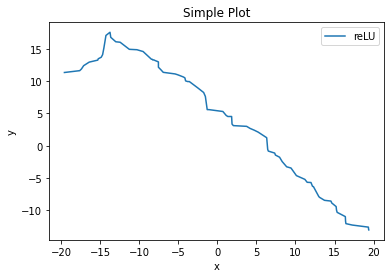

getLoss 39460448.76403044
PartialW,PartialB -895258.9763739984 -49468.41368933824


In [85]:
class Neurel:
  def __init__(self,w,b,f=reLU):
    self.w=w
    self.b=b
    self.f=f
  def fun(self,x):
    return self.f.fun(x) * self.w + self.b
  def pFun(self,x):
    return self.f.pFun(x) + self.w
  def pwFun(self,x):
    return self.f.pwFun(x)
  def pbFun(self,x):
    return self.f.pbFun(x)

network=Neurel(-100,200)
LEN = 80
x= [random.random()*40-20 for x in range(LEN)]
y= [random.random()*40-20 for x in range(LEN)]
x.sort()
y.sort(reverse=True)
y = [(y[i]>12 and 24-y[i] or y[i])+6 for i in range(LEN)]
# print(x)
class Data:
  def __init__(self,x,y):
    self.x = x
    self.y = y
data = Data(x,y)#[[x[i],y[i]] for i in range(LEN)]

plt.plot(x, y, label='reLU')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Simple Plot")

plt.legend()

plt.show()

def getLoss(nw,data):
  sq = [(data.y[i] - nw.fun(data.x[i]))**2 for i in range(len(data.x))]
  return sum(sq)

print('getLoss' ,getLoss(network,data))

def getPartialW(nw,data):
  getPwi = lambda x,y: 2*(y-nw.fun(x))*-nw.pwFun(x)
  return sum([getPwi(data.x[i], data.y[i], ) for i in range(len(data.x))])
def getPartialB(nw,dat):
  # def getPbi(x,y):
  getPbi = lambda x,y: 2*(y-nw.fun(x))*-nw.pbFun(x)
  return sum([getPbi(data.x[i], data.y[i], ) for i in range(len(data.x))])

print('PartialW,PartialB',
  getPartialW(network,data ),
  getPartialB(network,data )
)

def getResolutData(fun,xaxis):
  return [fun(xaxis[i]) for i in range(len(xaxis))]
import math
from matplotlib import cm
def drawGradient(axe,Nr,nw,data,xs,ys,gdRes,zoom=2,step=1): # w / b
  # 6:4
  xc=nw.w
  yc=nw.b
  # print(getLoss(Neurel(xc,yc),data),getLoss(Neurel(math.ceil(xc),math.ceil(yc)),data))
  dx=abs(xs-xc)
  dy=abs(ys-yc)
  x2y = 4*dx/6
  y2x = 6*dy/4
  if dx<y2x: dx = y2x
  if dy<x2y: dy = x2y
  dx= math.ceil(dx*zoom)
  dy= math.ceil(dy*zoom)

  xStaet = xc-dx
  xEnd = xc+dx
  yStaet = yc-dy
  yEnd = yc+dy

  xrange = np.arange(xStaet, xEnd, step)
  yrange = np.arange(yStaet, yEnd, step)
  # print(xrange,yrange)
  z=np.array([[getLoss(Nr(x,y),data) for x in xrange] for y in yrange])
  
  plt.xlabel('w')
  plt.ylabel('b')
  plt.imshow(z,extent=[xStaet,xEnd,yStaet,yEnd],cmap=cm.autumn)#plasma autumn 
  xCenter = z[:,math.floor(len(xrange)/2)]
  yCenter = z[math.floor(len(yrange)/2)]
  ct = z[math.floor(len(yrange)/2),math.floor(len(xrange)/2)]
  for i in range(len(gdRes['w'])):
    axe.plot(gdRes['w'][i], gdRes['b'][i], '.b', alpha=.6)
    axe.plot(gdRes['w'][i], gdRes['b'][i], '-b', alpha=.3)
  # print('center loss {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(
  #   getLoss(Neurel(xc,yc),data),ct,xCenter[0],xCenter[-1],yCenter[0],yCenter[-1]
  # ))
  # print(z[math.floor(len(yrange)/2)-1:math.floor(len(yrange)/2)+2,math.floor(len(xrange)/2)-1:math.floor(len(xrange)/2)+2])

def drawGraph(title,data,xaxis,Nr,nw,ws,bs,gdRes,zoom=2,step=1,drawGra=True):
  print('{} w:{:.4f} b:{:.4f} loss:{:.4f}'.format(title,nw.w,nw.b,getLoss(nw,data)))
  y = getResolutData(nw.fun,xaxis)
  # plt.figure(figsize=(6*3,4))
  fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(6*3,4))# figsize=(10, 5)
  # fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(4*3,3))# figsize=(10, 5)
  # fig, axes = plt.subplot(131)
  axes[0].set_title('{}-data'.format(title))
  axes[0].plot(xaxis,y,label='data')
  axes[0].plot(data.x,data.y,label='fun')
  # plt.subplot(132)
  axes[1].set_title('{}-loss'.format(title))
  axes[1].plot(range(len(gdRes['loss'])),gdRes['loss'],label='loss')
  # plt.subplot(133)
  drawGra and drawGradient(axes[2],Nr,nw,data,ws,bs,gdRes,zoom,step)
  plt.show()


In [86]:

weightStart = -100
biasStart = 80
# weightStart = -100
# biasStart = -120
xaxis = np.array(range(-200,200,1),np.float16)/10
# gradientDescent(network,data)

ETA = 0.00002

In [127]:

# 固定学习率的梯度下降
def gradientDescent(nw,data):
  eta=ETA
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb
    i%20 == 0 and print(i,'getLoss' ,pw,getLoss(network,data))

# 根据和梯度滤波值的差调整学习率的梯度下降
newRate = 0.2
def gradientDescent1(nw,data):
  eta=ETA
  pwf = getPartialW(nw,data )
  pbf = getPartialB(nw,data )
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb # (pb-pbf)/pbf
    i%20 == 0 and print(i,'getLoss' ,getLoss(network,data))
    pwf = (1-newRate)*pwf + newRate*pw
    pbf = (1-newRate)*pbf + newRate*pb

# Adagrad
def gradientDescentAdagrad(nw,data,eta=ETA,type=0,epoch=100):
  sumSqW = 0
  sumSqB = 0
  loss = []
  w=[]
  b=[]
  w.append(nw.w)
  b.append(nw.b)
  loss.append(getLoss(nw,data))
  for i in range(epoch):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    sumSqW = sumSqW + pw**2
    sumSqB = sumSqB + pb**2
    # print(i,'w:{:.4f} b:{:.4f} pw:{:.4f} pb:{:.4f}'.format(nw.w,nw.b,pw,pb))
    if type==0: # 不随时间衰减
      nw.w = nw.w - eta*pw/(sumSqW/(i+1))**0.5
      nw.b = nw.b - eta*pb/(sumSqB/(i+1))**0.5
    elif type==1: # 随时间衰减
      # i%20 == 0 and print(eta*pb/sumSqB**0.5)
      nw.w = nw.w - eta*pw/sumSqW**0.5
      nw.b = nw.b - eta*pb/sumSqB**0.5
    w.append(nw.w)
    b.append(nw.b)
    l=getLoss(nw,data)
    loss.append(l)
    # i%20 == 0 and print(i,'getLoss {:.4f} {:.4f} {:.4f}'.format( l,pb,(sumSqB/(i+1))**0.5))
    # print(i,'getLoss {:.4f} | {:.4f} {:.4f} {:.4f} | {:.4f} {:.4f} {:.4f}'.format( l,nw.w,pw,eta*pb/sumSqB**0.5,nw.w,pb,(sumSqB/(i+1))**0.5))
    # print(i,l,nw.b,eta,pb,sumSqB**0.5)
  return {
    'loss':loss,
    'w':w,
    'b':b,
  }


0 getLoss 27811535.8686 -68668.4137 68668.4137
20 getLoss 119879.3402 4777.2173 21244.3146
40 getLoss 2185.9356 571.3616 15289.0203
60 getLoss 608.6577 35.3684 12535.2087
80 getLoss 602.9476 1.2607 10878.1252
0 getLoss 14036406.3401 -68668.4137 68668.4137
20 getLoss 219631.4660 6220.0492 18012.2716
40 getLoss 38475.0965 2594.6085 13217.1131
60 getLoss 7270.3591 1089.1149 10882.0077
80 getLoss 1780.3793 457.7157 9450.5132
100 getLoss 810.9846 192.4021 8464.3652
120 getLoss 639.7039 80.8798 7733.4360
140 getLoss 609.4372 33.9995 7164.0303
Adagrad-notime w:-1.4168 b:11.2374 loss:602.9407


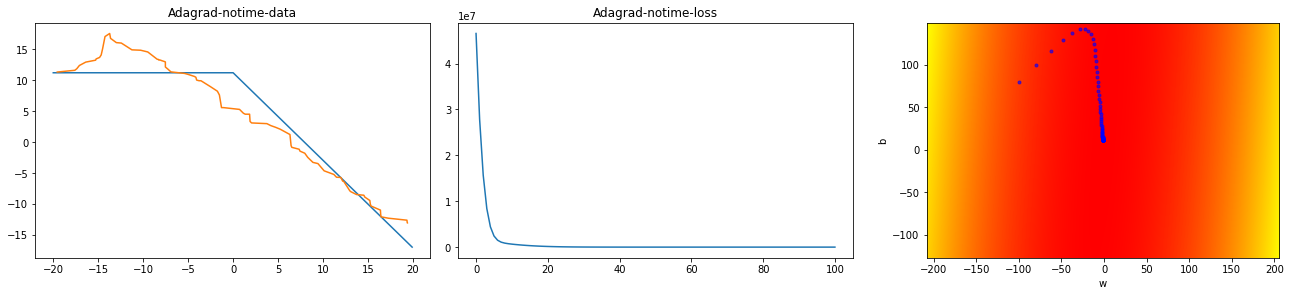

Adagrad w:-1.4379 b:11.4816 loss:605.9189


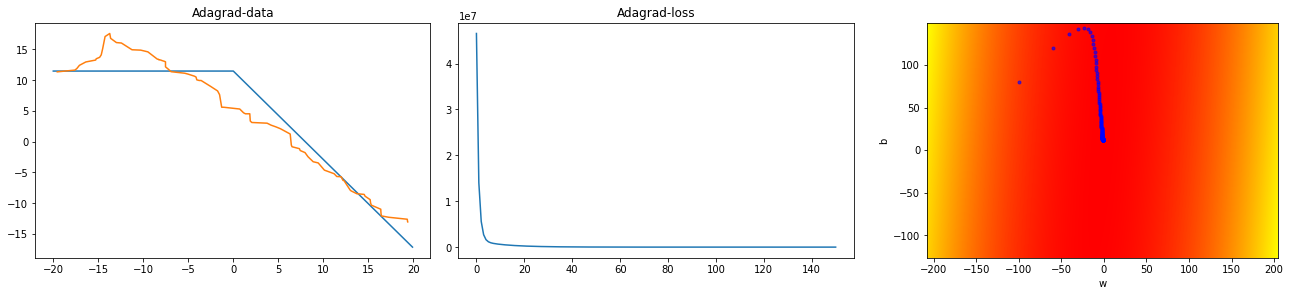

In [94]:

nwAdagradNt=Neurel(weightStart,biasStart)
nwAdagrad=Neurel(weightStart,biasStart)
graAdagradNt = gradientDescentAdagrad(nwAdagradNt,data,ETA*1000000,0)
graAdagrad = gradientDescentAdagrad(nwAdagrad,data,ETA*1000000*2,1,150)


# print(plt.rcParams["figure.figsize"])
# plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
drawGraph('Adagrad-notime',data,xaxis,Neurel,nwAdagradNt,weightStart,biasStart,graAdagradNt)
drawGraph('Adagrad',data,xaxis,Neurel,nwAdagrad,weightStart,biasStart,graAdagrad)


2754.5736971488823


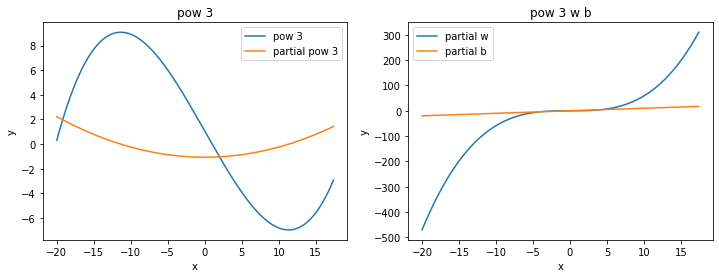

Adagrad w:0.1123 b:-1.1239 loss:1208.0881


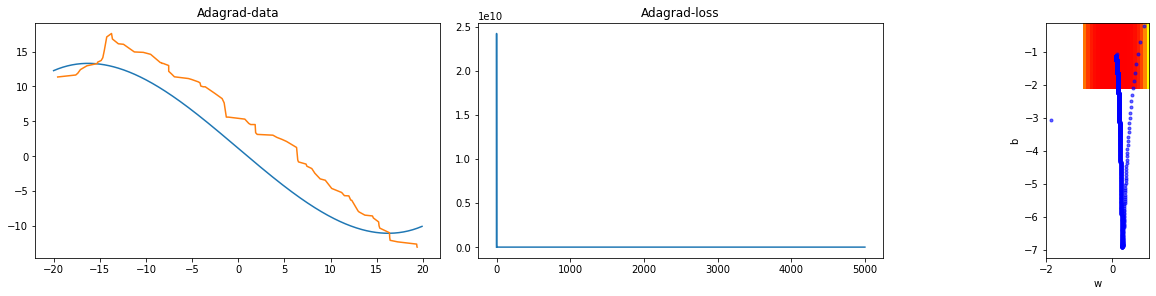

In [166]:
class P3Neurel:
  def __init__(self,w,b):
    self.w=w
    self.b=b
  def fun(self,x):
    return (self.b + self.w*x)**3
  def pFun(self,x):
    return 3*(self.b + self.w*x)**2*self.w
  def pwFun(self,x):
    return 3*(self.b + self.w*x)**2*x
  def pbFun(self,x):
    return 3*(self.b + self.w*x)**2
class P3Neurel1:
  def __init__(self,w,b):
    self.w=w
    self.b=b
  def fun(self,x):
    return (x*self.w)**3 + (x-1)*self.b
  def pFun(self,x):
    return 3*(x*self.w)**2*self.w + self.b
  def pwFun(self,x):
    return 3*(x*self.w)**2*x
  def pbFun(self,x):
    return x
# p3nw = P3Neurel1(weightStart,biasStart)
# tw=0.7
# tb=-15
# tw=0.2
# tb=-2
# tw=0.1
# tb=-1
tw=0.14
tb=-1.06
p3nw = P3Neurel1(tw,tb)


print(getLoss(p3nw,data))
drawFun('pow 3',p3nw,)
p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*100000,0,5000)
# Adagrad w:0.1123 b:-1.1239 loss:1208.0881
# Adagrad w:0.1396 b:-1.3397 loss:1404.3045
# print(getLoss(p3nw,data))
# drawGraph('pow 3 adagrad',data,xaxis,Neurel,p3nw,weightStart,biasStart,p3nwGraAdagrad,)

drawGraph('Adagrad',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)



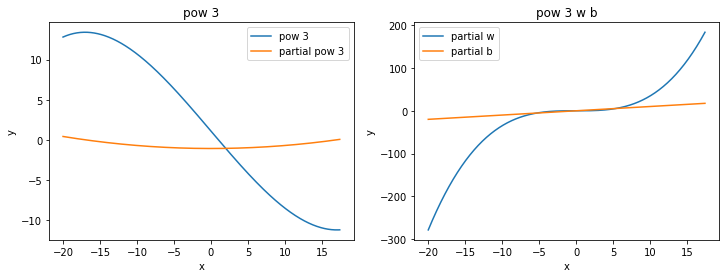

-3.214213403679259e-05 -0.7945790709508052
-3.138856120071234e-05 -0.8101116410426219
-3.7678840478951716e-05 -0.8064083480750842
-3.119094012964353e-05 -0.8101006661421931
-3.113611220446964e-05 -0.8101012492407192
p3 Adagrad w:-0.0000 b:-0.8101 loss:1491.2187


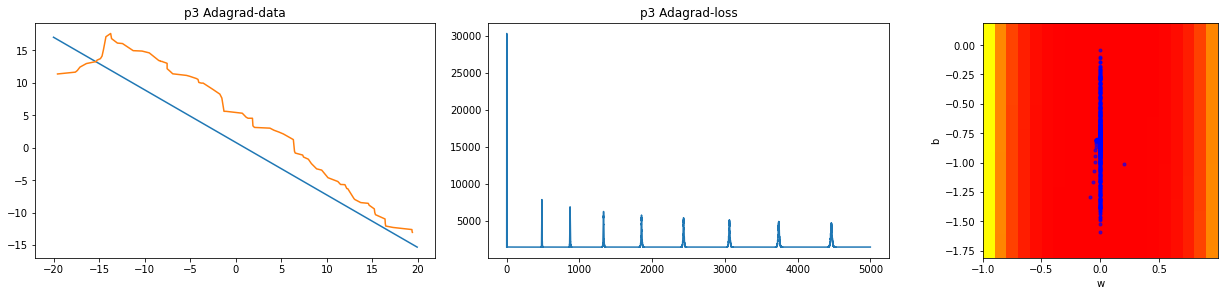

In [167]:
# tw=0.1396
# tb=-1.3397
tw=0.10773
tb=-1.08673
# tw=0.10773006086124058 
# tb=-1.0867343765622317
p3nw = P3Neurel1(tw,tb)
drawFun('pow 3',p3nw,)
for i in range(5):
  p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*10000,0,5000)
  print(p3nw.w,p3nw.b)
drawGraph('p3 Adagrad',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)

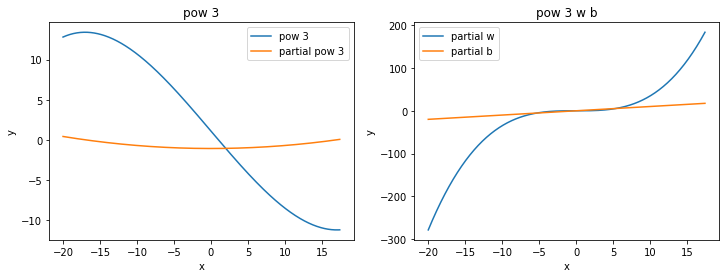

-0.00010802306543993179 -0.8101051260247407
-0.00010052660413741022 -0.8101051260791644
-9.400431780500363e-05 -0.8101051261201386
-8.827775799751744e-05 -0.8101051261517234
-8.32095751362259e-05 -0.8101051261764621
p3 Adagrad t w:-0.0001 b:-0.8101 loss:1491.2165


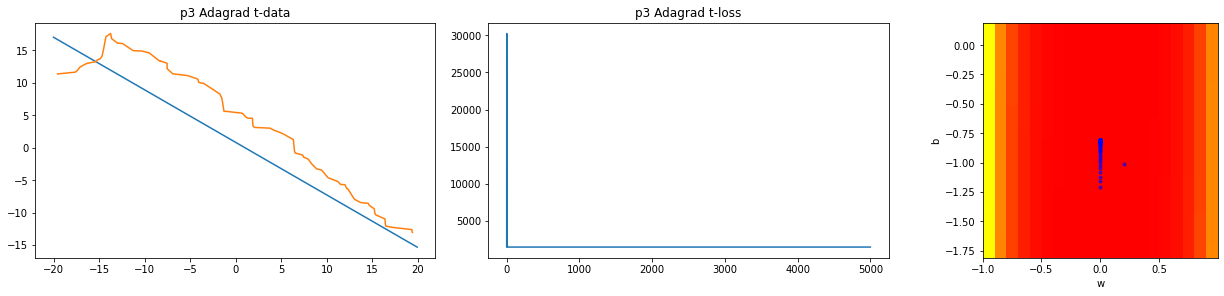

In [168]:

p3nw = P3Neurel1(tw,tb)
drawFun('pow 3',p3nw,)
for i in range(5):
  p3nwGraAdagrad = gradientDescentAdagrad(p3nw,data,ETA*10000,1,5000)
  print(p3nw.w,p3nw.b)
drawGraph('p3 Adagrad t',data,xaxis,P3Neurel1,p3nw,tw,tb,p3nwGraAdagrad,1.1,0.1)
# 线性模型学习非线性数据有时候太敏感 有时候又卡在局部最优解(可能参数在一些地方对数据不敏感 也可能是因为维度太少的关系)

[[-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 ...
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]] [-2.0, 2.0, -2.0, 2.0]


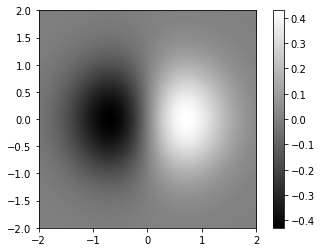

In [90]:
#func2d.py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

y,x = np.ogrid[-2:2:200j,-2:2:200j]
z = x * np.exp(-x**2-y**2)
extent = [np.min(x),np.max(x),np.min(y),np.max(y)]
print(z,extent)
plt.imshow(z,extent=extent,cmap=cm.gray)
plt.colorbar()
plt.show()